# Data extraction

#### Python Imports 

In [10]:
from PIL import Image as pil_image 
import pandas as pd
import numpy as np
import os

## Exploring the Datasets

#### Clothing Attributes

Read in 'list_attr_cloth.txt' as attribute_df. We ignore the first two lines as they contain metadata not required at the moment.

In [11]:
def read_file_deep_fashion(path, ignore_lines = [0,1]):
    lines = []
    line_count = 0
    with open(path) as file:
        print('Starting Read...')
        for line in file:
            if line_count in ignore_lines:
                print('Ignoring Line {}'.format(line_count))
            else:
                lines.append([' '.join(line.split()[0:-1]),line.split()[-1]] )
            line_count += 1
    print('Read complete')
    file.close()
    return lines

In [12]:
lines = read_file_deep_fashion('list_attr_cloth.txt')
attribute_df = pd.DataFrame(lines, columns = ['attribute','attribute_type'])

FileNotFoundError: [Errno 2] No such file or directory: 'list_attr_cloth.txt'

In [13]:
attribute_df[attribute_df['attribute_type'] == '1'].head()

NameError: name 'attribute_df' is not defined

#### Image names and their labels 

In [14]:
lines = read_file_deep_fashion('list_category_img.txt')
category_images = pd.DataFrame(lines, columns = ['image_name','category_label'])

FileNotFoundError: [Errno 2] No such file or directory: 'list_category_img.txt'

In [15]:
category_images.head()

NameError: name 'category_images' is not defined

#### Category Labels and Types

In [11]:
lines = read_file_deep_fashion('list_category_cloth.txt')
category_types = pd.DataFrame(lines, columns = ['category_name','category_type'])
category_types['category_label'] = category_types.index+1
category_types['category_label'] = category_types['category_label'].astype(str)

Starting Read...
Ignoring Line 0
Ignoring Line 1
Read complete


In [12]:
category_types.head()

,category_name,category_type,category_label
0,Anorak,1,1
1,Blazer,1,2
2,Blouse,1,3
3,Bomber,1,4
4,Button-Down,1,5


#### Merge 'category_types' and 'category_images' to get every image and its label in English.

In [13]:
category_types = category_types.merge(category_images, on = 'category_label')

In [14]:
category_types.head()

,category_name,category_type,category_label,image_name
0,Anorak,1,1,img/Hooded_Cotton_Canvas_Anorak/img_00000001.jpg
1,Anorak,1,1,img/Hooded_Cotton_Canvas_Anorak/img_00000002.jpg
2,Anorak,1,1,img/Hooded_Cotton_Canvas_Anorak/img_00000003.jpg
3,Anorak,1,1,img/Hooded_Cotton_Canvas_Anorak/img_00000004.jpg
4,Anorak,1,1,img/Hooded_Cotton_Canvas_Anorak/img_00000005.jpg


### Get all the available categories

In [40]:
category_types.category_name.unique()

array(['Anorak', 'Blazer', 'Blouse', 'Bomber', 'Button-Down', 'Cardigan',
       'Flannel', 'Halter', 'Henley', 'Hoodie', 'Jacket', 'Jersey',
       'Parka', 'Peacoat', 'Poncho', 'Sweater', 'Tank', 'Tee', 'Top',
       'Turtleneck', 'Capris', 'Chinos', 'Culottes', 'Cutoffs', 'Gauchos',
       'Jeans', 'Jeggings', 'Jodhpurs', 'Joggers', 'Leggings', 'Sarong',
       'Shorts', 'Skirt', 'Sweatpants', 'Sweatshorts', 'Trunks', 'Caftan',
       'Coat', 'Coverup', 'Dress', 'Jumpsuit', 'Kaftan', 'Kimono',
       'Onesie', 'Robe', 'Romper'], dtype=object)

Choosing 5 categories:
    Tee, Dress, Blouse, Cardigan and Jacket

Create folders of the above names:

In [9]:
categories_list = ['Tee', 'Dress', 'Blouse', 'Cardigan', 'Jacket']
my_path = '/Users/julitastraszak/Documents/GitHub/tensorflow-for-poets-2/tf_files/apparel_photos'
for i in range (len(categories_list)):
    category = categories_list[i]
    my_path_complete = ''.join((my_path , '/', category))
    print (my_path_complete)
    os.makedirs(my_path_complete)

/Users/julitastraszak/Documents/GitHub/tensorflow-for-poets-2/tf_files/apparel_photos/Tee
/Users/julitastraszak/Documents/GitHub/tensorflow-for-poets-2/tf_files/apparel_photos/Dress
/Users/julitastraszak/Documents/GitHub/tensorflow-for-poets-2/tf_files/apparel_photos/Blouse
/Users/julitastraszak/Documents/GitHub/tensorflow-for-poets-2/tf_files/apparel_photos/Cardigan
/Users/julitastraszak/Documents/GitHub/tensorflow-for-poets-2/tf_files/apparel_photos/Jacket


### Get another column using information from an existing one 

In [15]:
category_types.at[0,'image_name']

'img/Hooded_Cotton_Canvas_Anorak/img_00000001.jpg'

In [16]:
print ("Adding a new column using the existing columns in DataFrame:")
saving_names = []
categories = []
for row_index, row in category_types.iterrows():
    image_name = category_types.at[row_index, 'image_name']
    splited = image_name.split("/")
    middle = splited [1]
    image_name_for_saving = splited [2]
    saving = ''.join((middle,image_name_for_saving))
    saving_names.append(saving)

category_types['image_name_for_saving'] = saving_names 

Adding a new column using the existing columns in DataFrame:


In [41]:
category_types.head()

,category_name,category_type,category_label,image_name,image_name_for_saving
0,Anorak,1,1,img/Hooded_Cotton_Canvas_Anorak/img_00000001.jpg,Hooded_Cotton_Canvas_Anorakimg_00000001.jpg
1,Anorak,1,1,img/Hooded_Cotton_Canvas_Anorak/img_00000002.jpg,Hooded_Cotton_Canvas_Anorakimg_00000002.jpg
2,Anorak,1,1,img/Hooded_Cotton_Canvas_Anorak/img_00000003.jpg,Hooded_Cotton_Canvas_Anorakimg_00000003.jpg
3,Anorak,1,1,img/Hooded_Cotton_Canvas_Anorak/img_00000004.jpg,Hooded_Cotton_Canvas_Anorakimg_00000004.jpg
4,Anorak,1,1,img/Hooded_Cotton_Canvas_Anorak/img_00000005.jpg,Hooded_Cotton_Canvas_Anorakimg_00000005.jpg


In [43]:
len (category_types)

289222

In [37]:
path_to_folder = '/Users/julitastraszak/Documents/GitHub/tensorflow-for-poets-2/tf_files/apparel_photos'
all_paths = []
def save_images_per_category( data , category_name , path_to_folder):
    for row_index, row in category_types.iterrows():
        img_cat = data.at[row_index, 'category_name']
        if category_name == img_cat:
            image_name = category_types.at[row_index, 'image_name_for_saving']
            saving_path = os.path.join(path_to_folder, category_name, image_name)
            image = pil_image.open(data.at[row_index, 'image_name'])
            image.save(saving_path, 'JPEG')

In [38]:
Anorak = 'Anorak'
save_images_per_category( category_types, Anorak , path_to_folder)

Save all the images of classes indicated 

In [ ]:
for i in range (len(categories_list)):
    category = categories_list[i]
    save_images_per_category (category_types, category, path_to_folder)

## Example Image

Below we show an example image and what it looks like in the data.

In [444]:
image = pil_image.open('img/Sheer_Pleated-Front_Blouse/img_00000001.jpg')

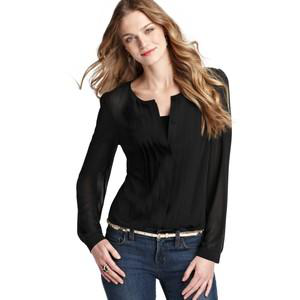

In [445]:
image

In [446]:
np.array(image).shape

(300, 300, 3)

In [448]:
category_types[category_types['image_name'] == 'img/Sheer_Pleated-Front_Blouse/img_00000001.jpg']

,category_name,category_type,category_label,image_name
7655,Blouse,1,3,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg


In [210]:
image_bounding_box[image_bounding_box['image_name'] == 'img/Sheer_Pleated-Front_Blouse/img_00000001.jpg']

,image_name,x_1,y_1,x_2,y_2
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,072,079,232,273


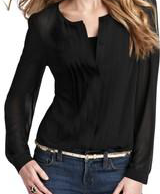

In [429]:
image.crop([72, 79, 232, 273])

### Creating the Data Pipeline 

We look to create a Data Pipeline which only retrieves images which fit the criteria:
    - Front facing images
    - Are in a category which has at least 1000 images.
    - Once cropped are at least 60x60 pixels.
    
Once we have the set of images we will use, we read each image in, crop so that it contains only the item of clothing, and write out again to a new directory.

The original dataframe contains this many rows.